# Let's install the dependencies and login to our HF account to access the Inference API
If you haven't installed smolagents yet, you can do so by running the following command:

In [1]:
!pip install smolagents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 5.1 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login
notebook_login()

# The @tool Decorator

Generating a tool that retrieves the highest-rated catering
Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the @tool decorator to make this happen:

In [4]:
from smolagents import CodeAgent, HfApiModel, tool

#Let's pretend we have a function that fetches the highest-rated catering services.

@tool
def catering_service_tool(query:str) ->str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services. 
    """
    #Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.":4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events":4.7,
    }
    #Find the highest catering service (simulating search query filtering)
    best_service = max(services, key = services.get)
    
    return best_service

#Run the  agent to find the best catering service

agent = CodeAgent(tools = [catering_service_tool], model= HfApiModel())
result = agent.run("Can you give me the name of the highest-rated catering service in Gotham City?")

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 0.31 seconds| Input tokens: 2,043 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print("The highest-rated catering service in Gotham City is:", highest_rated_catering_service)                   
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
The highest-rated catering service in Gotham City is: Gotham Catering Co.

Out: None

[Step 2: Duration 3.70 seconds| Input tokens: 4,249 | Output tokens: 146]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 3: Duration 6.62 seconds| Input tokens: 6,652 | Output tokens: 211]

Gotham Catering Co.


# Defining a Tool as a Python Class

Generating a tool to generate ideas about the superhero-themed party
Alfred's party at the mansion is a superhero-themed event, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [5]:
from smolagents import CodeAgent, HfApiModel, Tool

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """ This tool suggest creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea"""


    inputs = {"category": {
        "type":"string",
        "description":"The type of superhero party (eg., 'classic hero','vilian masquerade','futuristic Gotham').",
        
    }}
    output_type = "string"
    def forward(self, category:str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }
        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")


#Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools = [party_theme_tool], model = HfApiModel())

#Run the agent to generate a party theme idea
result = agent.run("What would be a good superhero party idea for a 'villain masquerade' theme?")
print(result)


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villian masquerade")                        
  print("Suggested theme:", villain_masquerade_theme)                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Suggested theme: Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.

Out: None

[Step 1: Duration 4.51 seconds| Input tokens: 2,073 | Output tokens: 77]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print("Suggested theme:", villain_masquerade_theme)                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Suggested theme: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 2: Duration 5.08 seconds| Input tokens: 4,345 | Output tokens: 163]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 3: Duration 4.06 seconds| Input tokens: 6,819 | Output tokens: 234]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


# Sharing a Tool to the Hub
Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the push_to_hub() method.

For instance, Alfred can share his catering_service_tool to help others find the best catering services in Gotham. Here's how to do it:

In [6]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
huggingface_token = user_secrets.get_secret("huggingface_token")

In [8]:
party_theme_tool.push_to_hub("Rasheed91/catering_service_tool", token = huggingface_token)

README.md:   0%|          | 0.00/241 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/spaces/Rasheed91/catering_service_tool/commit/1885052968d7763b0b011586580b0594d6ae233b', commit_message='Upload tool', commit_description='', oid='1885052968d7763b0b011586580b0594d6ae233b', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/Rasheed91/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='Rasheed91/catering_service_tool'), pr_revision=None, pr_num=None)

# Importing a Tool from the Hub

You can easily import tools created by other users using the load_tool() function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor, featuring made-up superheroes with intricate        
  costumes and high-tech gadgets. The scene includes a grand ballroom with chandeliers, a catered gourmet buffet   
  with exotic dishes, and a dance floor filled with superheroes and their admirers. Decorations include banners    
  and posters of the made-up superheroes, and the atmosphere is vibrant and festive."                              
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024 at 0x7DECA05D47D0>

[Step 1: Duration 0.61 seconds| Input tokens: 2,073 | Output tokens: 147]

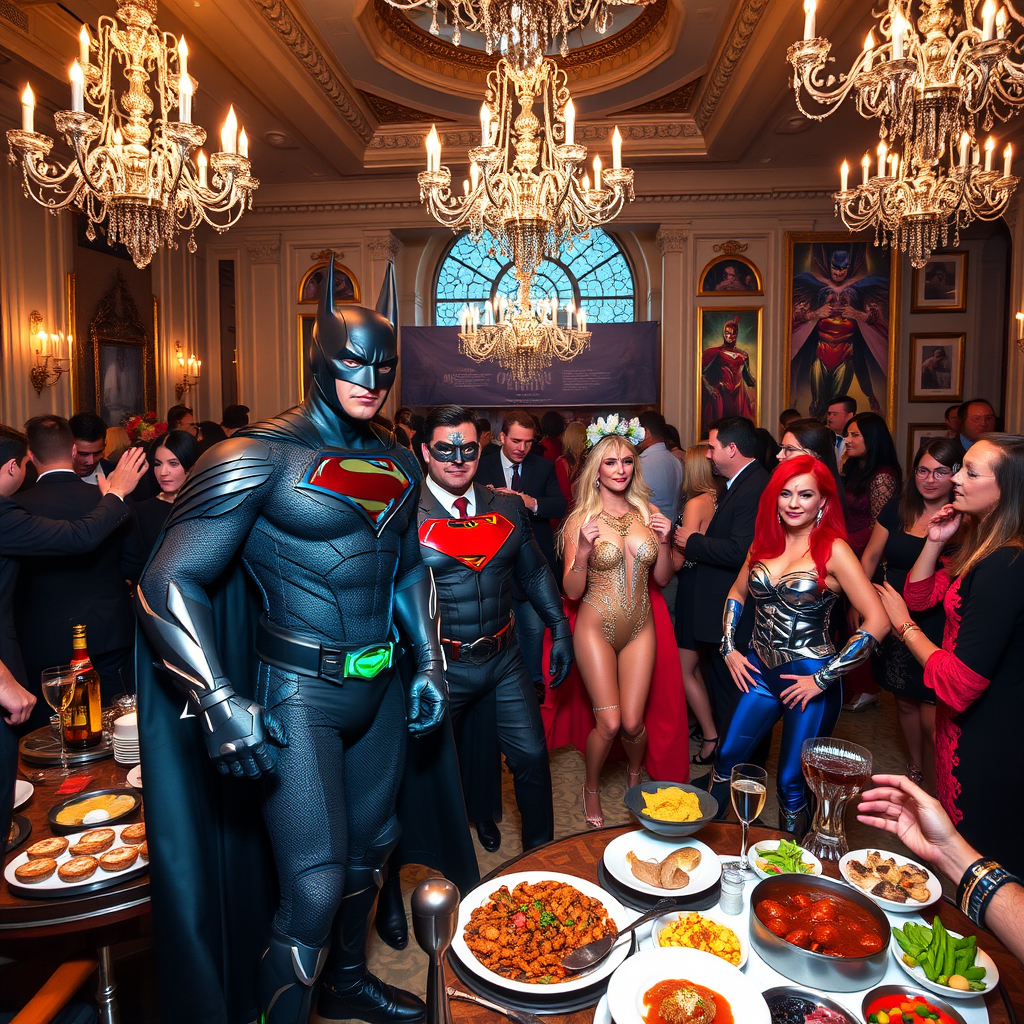

In [19]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool("m-ric/text-to-image", trust_remote_code = True)

agent = CodeAgent( tools = [image_generation_tool], model =HfApiModel())

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

# Importing a Hugging Face Space as a Tool
You can also import a HF Space as a tool using Tool.from_space(). This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the gradio_client, so make sure to install it via pip if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [20]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 12.3 MB/s eta 0:00:00


In [21]:
from smolagents import CodeAgent, HfApiModel,Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")
agent = CodeAgent(tools = [image_generation_tool], model = model)
agent.run("Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'})

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = (                                                                                              
      "A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala. "                   
      "The party is filled with guests dressed as iconic superheroes, with guests wearing masks, capes, and        
  colorful costumes. "                                                                                             
      "The ambiance is vibrant and exciting, with bright city lights reflected through the large windows. "        
      "Alfred is standing at the entrance, elegantly dressed in his traditional butler attire, greeting guests     
  with a polite and professional demeanor. "                                                                       
      "The hall is adorned with red and gold decorations, and there are large banners depicting superhero          
  symbols. "                                                                                                       
      "A string quartet is playing in the background, adding a touch of sophistication to the celebration. "       
      "Splendid chandeliers hang above the golden tables adorned with elegant cutlery and fancy plates, where      
  guests are enjoying gourmet food."                                                                               
  )                                                                                                                
                                                                                                                   
  # Generating the image                                                                                           
  image = image_generator(improved_prompt)                                                                         
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: /tmp/gradio/ec84d09baa47e7190f4787ab79ef837ef7f8ee3a4fc407d09f3e0b800cf08513/image.webp

[Step 1: Duration 16.65 seconds| Input tokens: 2,071 | Output tokens: 279]

'/tmp/gradio/ec84d09baa47e7190f4787ab79ef837ef7f8ee3a4fc407d09f3e0b800cf08513/image.webp'

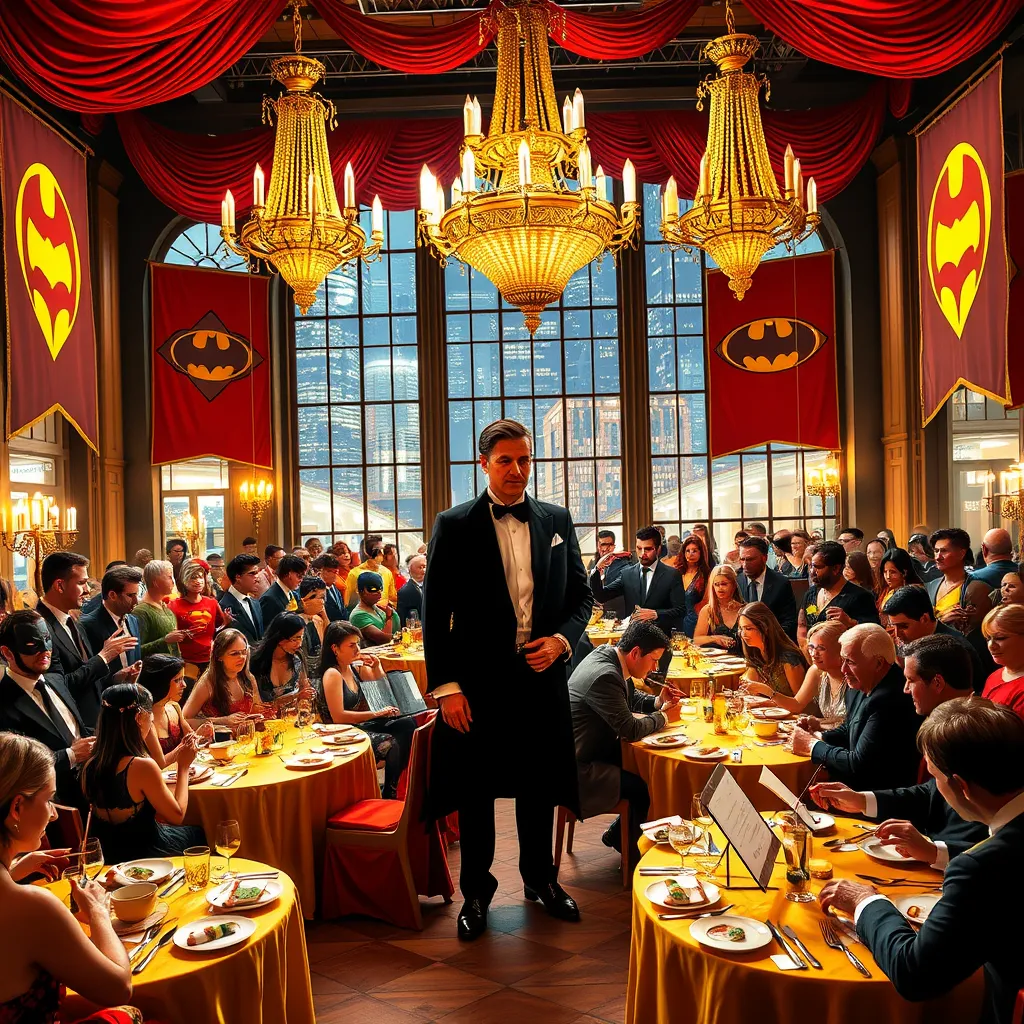

In [22]:
from PIL import Image as PILImage


image_path = '/tmp/gradio/ec84d09baa47e7190f4787ab79ef837ef7f8ee3a4fc407d09f3e0b800cf08513/image.webp'
image = PILImage.open(image_path)
image